In [1]:
# See about the Fourier components of some of these solutions
from scipy.fft import fft, ifft, rfft, irfft, fftfreq
import numpy as np
import matplotlib.pylab as plt
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity

In [2]:
%matplotlib notebook

1000
0.1
2.5
1000


<IPython.core.display.Javascript object>


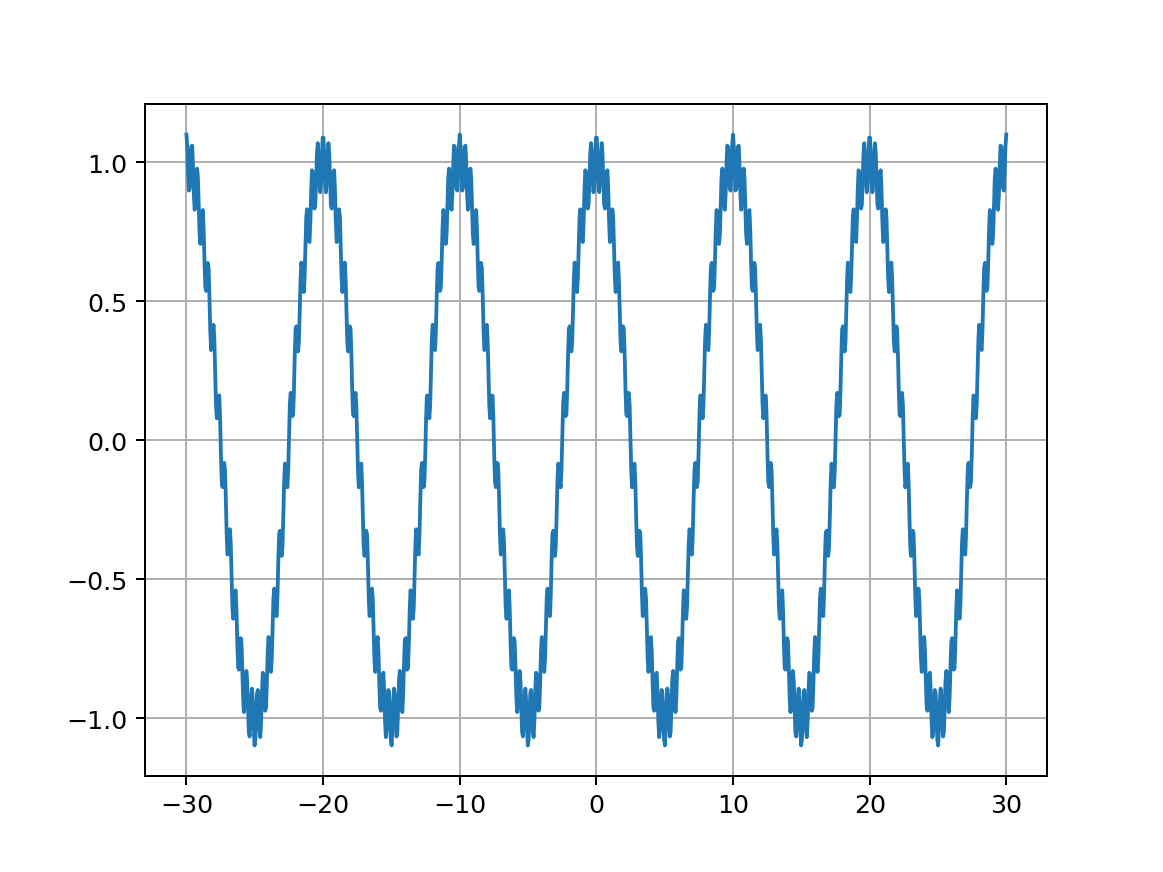

In [3]:
L = 30
x = np.linspace(-L,L,1000)
nx = x.size; print(nx)
dx = x[1]-x[0]
l1 = 10; k1 = 1/l1; print(k1); a1 = 1
l2 = .4; k2 = 1/l2; print(k2); a2 = 0.1
f = a1*np.cos(2*np.pi*x*k1)+a2*np.cos(2*np.pi*x*k2)
nf = len(f); print(nf)
plt.figure()
plt.plot(x,f)
plt.grid(True)

501
501


<IPython.core.display.Javascript object>


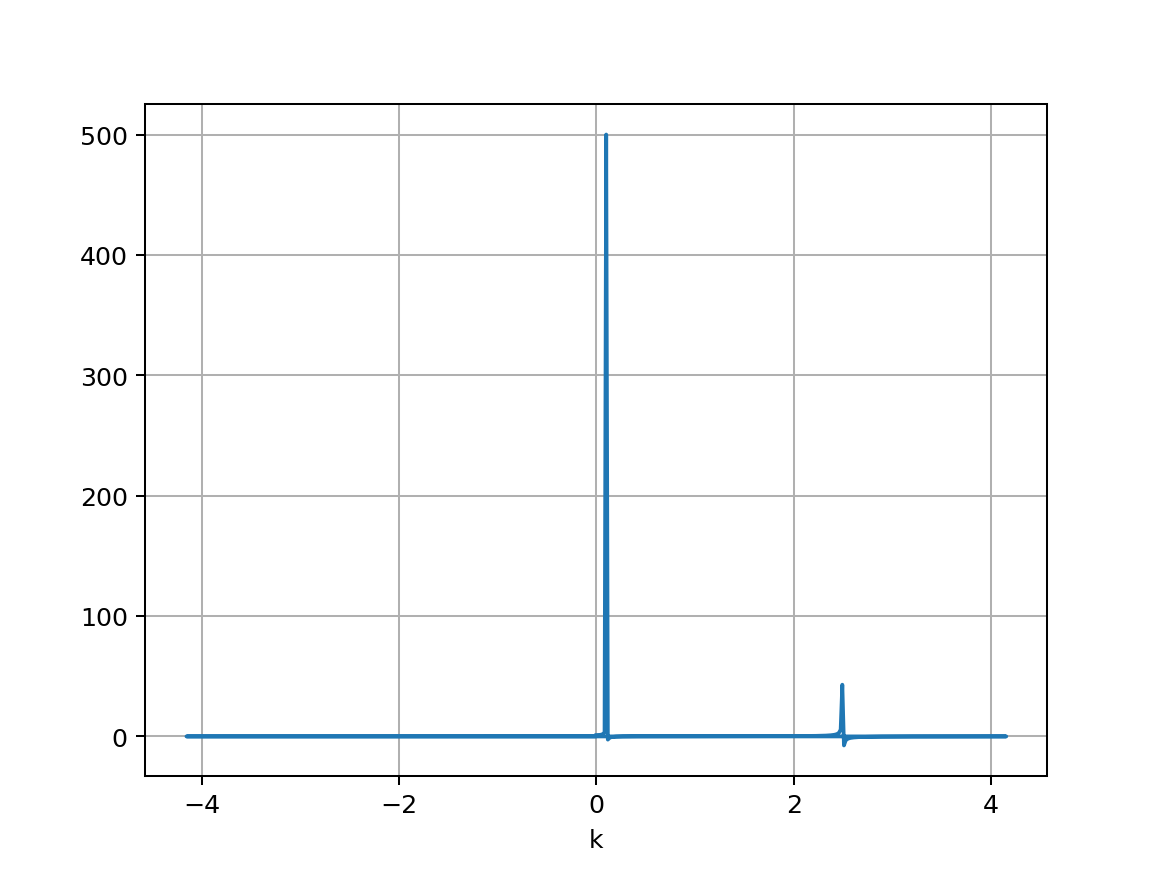

In [4]:
F = rfft(f); nF = len(F); print(nF)
k = fftfreq(nF,d=dx)/2; nk = len(k); print(nk)
plt.figure()
plt.plot(k,np.real(F))
plt.xlabel('k')
plt.grid(True)

<IPython.core.display.Javascript object>


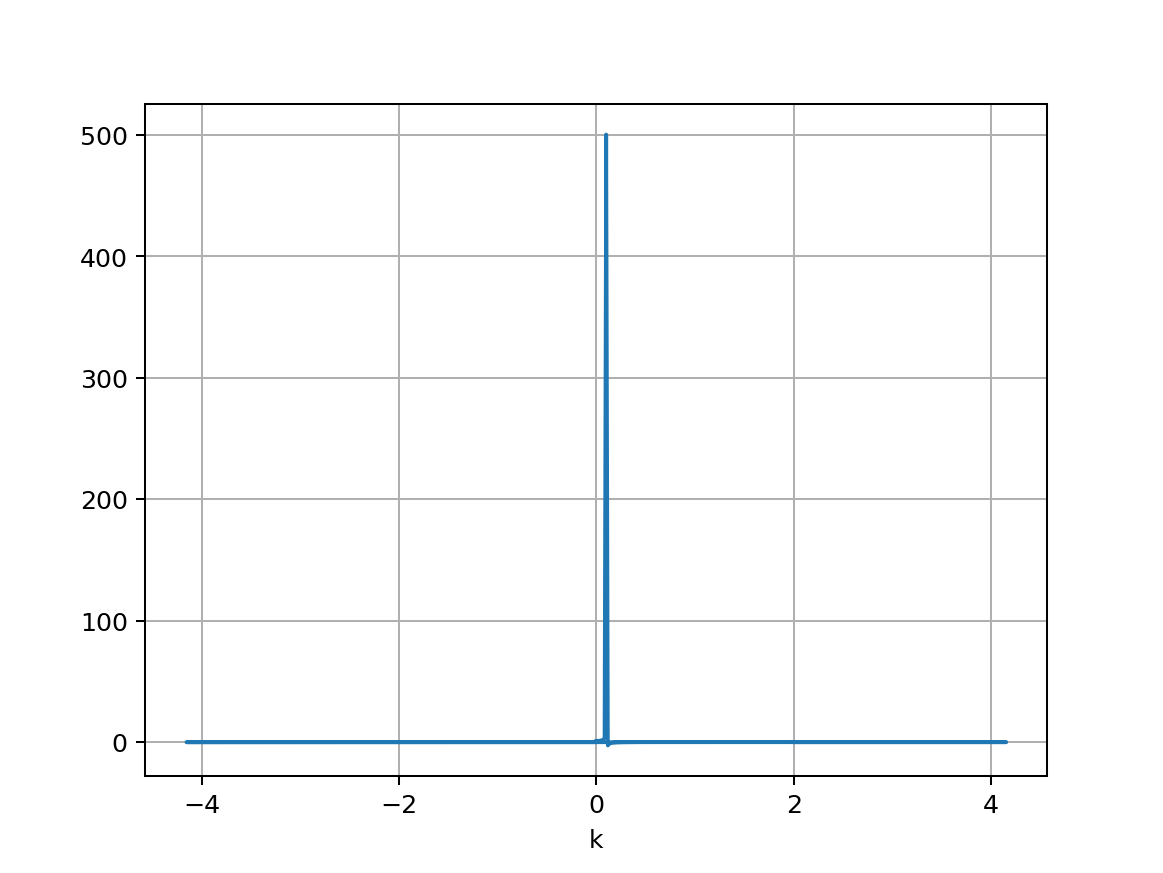

In [5]:
kmax = 2
Fprime = np.copy(F)
Fprime[(k>kmax)] = 0
plt.figure()
plt.plot(k,np.real(Fprime))
plt.xlabel('k')
plt.grid(True)

1000
1000


<IPython.core.display.Javascript object>


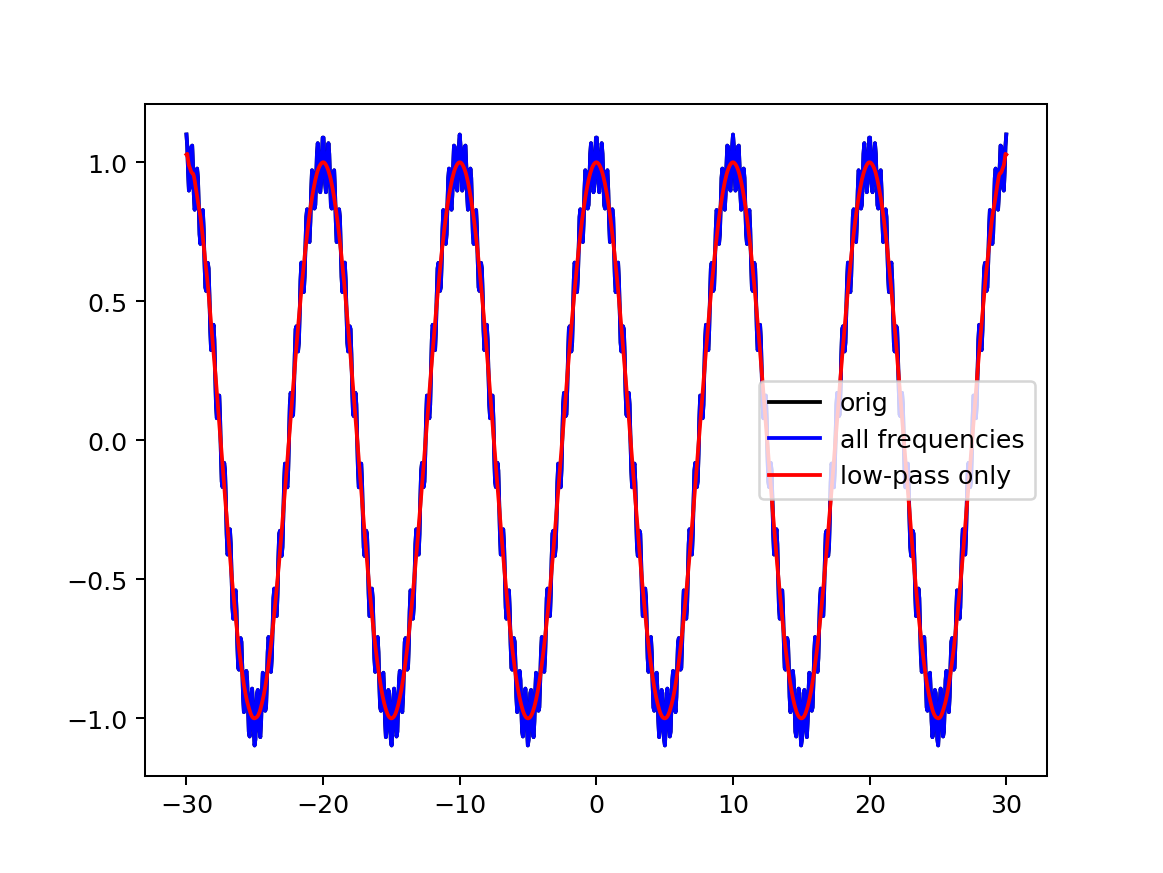

In [6]:
f_recon = irfft(F); print(len(f_recon))
fprime_recon = irfft(Fprime); print(len(fprime_recon))
plt.figure()
plt.plot(x,f,'k',label='orig')
plt.plot(x,f_recon,'b',label='all frequencies')
plt.plot(x,fprime_recon,'r',label='low-pass only')
plt.legend()

<IPython.core.display.Javascript object>


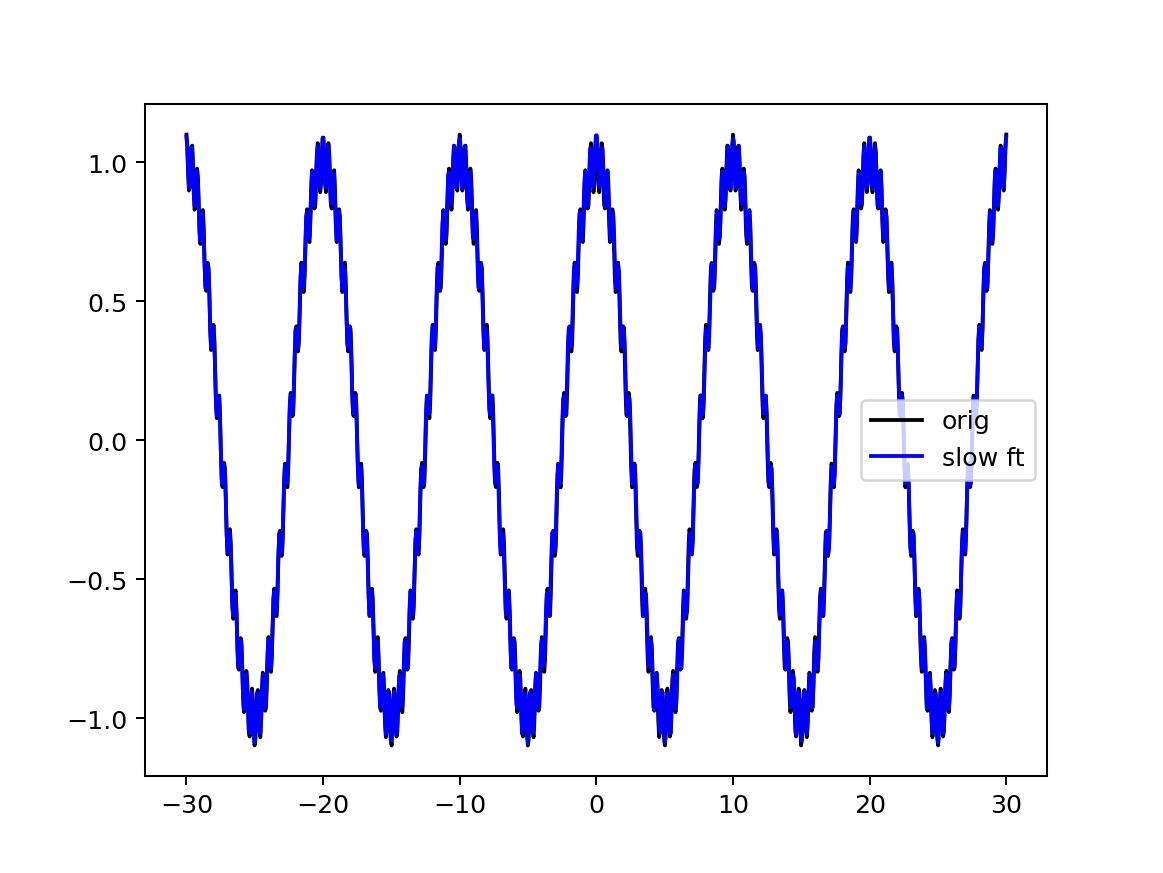

In [7]:
j_list = np.array([j for j in range(len(F))])
fprime2 = np.zeros(len(x))
for j in j_list:
    fprime2 += np.real(F[j])*np.cos(j*np.pi*x/L)
fprime2 *= dx/L
plt.figure()
plt.plot(x,f,'k',label='orig')
plt.plot(x,fprime2,'b',label='slow ft')
plt.legend()

<IPython.core.display.Javascript object>


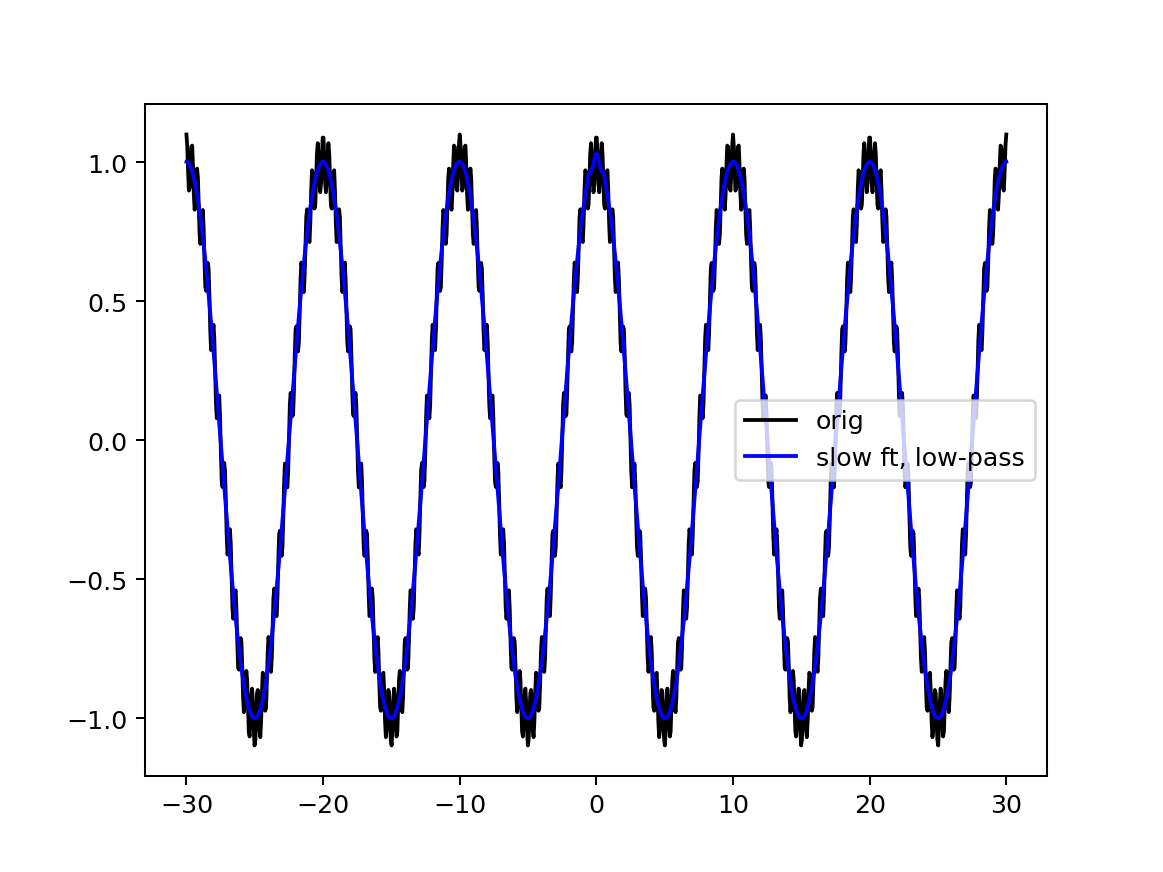

In [8]:
fprime3 = np.zeros(len(x))
for j in j_list:
    fprime3 += np.real(Fprime[j])*np.cos(j*np.pi*x/L)
fprime3 *= dx/L
plt.figure()
plt.plot(x,f,'k',label='orig')
plt.plot(x,fprime3,'b',label='slow ft, low-pass')
plt.legend()

<IPython.core.display.Javascript object>


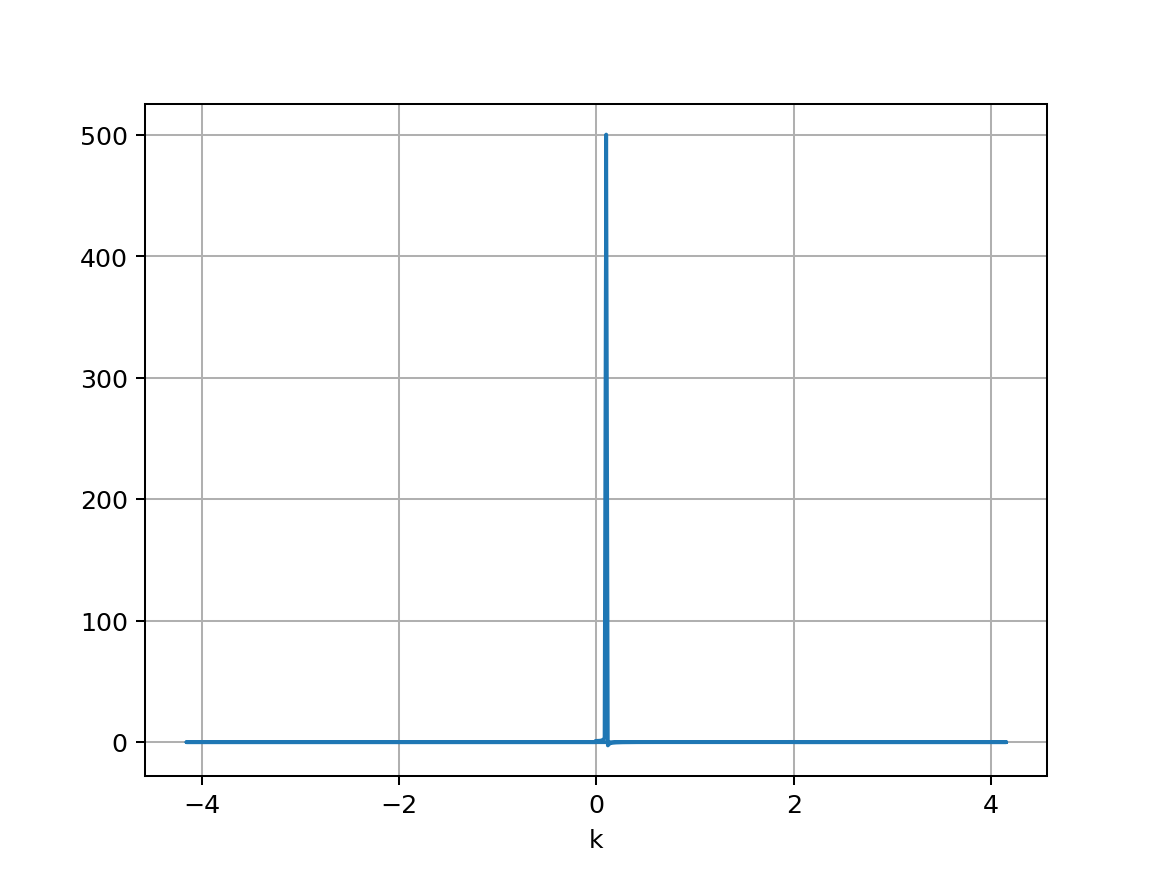

In [9]:
jmax = 2*kmax*L
Fprime = np.copy(F)
Fprime[(j_list>jmax)] = 0
plt.figure()
plt.plot(k,np.real(Fprime))
plt.xlabel('k')
plt.grid(True)

In [10]:
theta = AssignQuantity(28, 'degrees')
beta_trans = np.sin(theta/2)/np.cos(theta/2)
print('beta_trans =', beta_trans)
h_prismatic = AssignQuantity(0.389,'nanometer') 
dNtot_dx_trans = beta_trans/h_prismatic
dNtot_dx_trans.ito('1/micrometer')
print('dNtot_dx_trans =', dNtot_dx_trans)
dx = AssignQuantity(0.075,'micrometer') # This would be a pretty fine mesh
delta_Ntot = dNtot_dx_trans*dx
print('delta_Ntot =', delta_Ntot)

beta_trans = 0.2493280028431807 dimensionless
dNtot_dx_trans = 640.9460227331123 / micrometer
delta_Ntot = 48.07095170498342 dimensionless


In [11]:
Ntot_85 = np.array([\
       9.87296151, 9.86976004, 9.86616587, 9.86250853, 9.8589607 ,
       9.85558642, 9.85230271, 9.84919272, 9.84615516, 9.84327778,
       9.84046075, 9.83778841, 9.83516734, 9.83267632, 9.8302294 ,
       9.82789936, 9.82560753, 9.82342098, 9.82126766, 9.81920945,
       9.81718019, 9.81523714, 9.81331928, 9.81147983, 9.80966226,
       9.80791624, 9.80618914, 9.80452754, 9.80288221, 9.80129704,
       9.79972572, 9.79820984, 9.79670564, 9.79525268, 9.79380944,
       9.7924137 , 9.79102589, 9.78968225, 9.78834491, 9.78704875,
       9.7857574 , 9.78450457, 9.78325514, 9.78204185, 9.78083068,
       9.77965347, 9.77847718, 9.77733289, 9.7761884 , 9.77507415,
       9.77395863, 9.77287174, 9.77178256, 9.77072056, 9.7696553 ,
       9.76861588, 9.76757226, 9.76655329, 9.7655292 , 9.76452866,
       9.76352214, 9.76253816, 9.76154735, 9.76057818, 9.75960135,
       9.75864533, 9.75768083, 9.75673639, 9.75578265, 9.75484828,
       9.75390377, 9.75297803, 9.75204132, 9.75112282, 9.75019252,
       9.74927992, 9.74835467, 9.74744667, 9.74652515, 9.74562047,
       9.74470137, 9.74379873, 9.74288073, 9.74197885, 9.74106064,
       9.74015825, 9.73923853, 9.73833439, 9.73741187, 9.73650473,
       9.73557815, 9.73466677, 9.73373482, 9.73281794, 9.7318793 ,
       9.73095564, 9.73000896, 9.72907718, 9.72812108, 9.72717983,
       9.72621286, 9.72526074, 9.72428142, 9.72331698, 9.72232377,
       9.7213455 , 9.72033678, 9.71934308, 9.71831712, 9.71730629,
       9.71626128, 9.71523153, 9.71416554, 9.71311497, 9.71202594,
       9.71095252, 9.70983826, 9.70873984, 9.70759801, 9.70647227,
       9.70530037, 9.70414484, 9.70294017, 9.70175217, 9.70051182,
       9.69928845, 9.69800926, 9.69674738, 9.69542591, 9.69412207,
       9.69275459, 9.69140503, 9.68998743, 9.68858804, 9.68711583,
       9.68566204, 9.68413028, 9.68261706, 9.68102031, 9.67944207,
       9.67777434, 9.67612485, 9.67437951, 9.67265177, 9.67082144,
       9.66900759, 9.66708411, 9.66517522, 9.66314952, 9.66113547,
       9.65899747, 9.65686663, 9.65460517, 9.65234406, 9.64994681,
       9.64753975, 9.64499317, 9.64242168, 9.63971112, 9.63695311,
       9.63406302, 9.63109172, 9.62800619, 9.6247884 , 9.62149232,
       9.61798589, 9.6144671 , 9.61061698, 9.60687032, 9.60260211,
       9.59863656, 9.59384596, 9.58969713, 9.58423267, 9.57998427,
       9.57361936, 9.56943845, 9.56182776, 9.5580199 , 9.54863414,
       9.54572432, 9.53375997, 9.53260072, 9.51686887, 9.51876588,
       9.49757947, 9.50440545, 9.4755074 , 9.48974926, 9.45034701,
       9.47501199, 9.42199038, 9.46030435, 9.39065606, 9.44554099,
       9.35697309, 9.43038901, 9.32196137, 9.4142967 , 9.28688514,
       9.39661097, 9.2530207 , 9.37674863, 9.22142435, 9.35436159,
       9.19277919, 9.3294413 , 9.1673523 , 9.30233509, 9.14504702,
       9.2736778 , 9.12551191, 9.24426665, 9.10826594, 9.21492049,
       9.09280847, 9.18636196, 9.07869578, 9.15914594, 9.06557981,
       9.13363731, 9.0532152 , 9.11002614, 9.04144631, 9.08836315,
       9.03018527, 9.06860061, 9.01938956, 9.05062921, 9.0090432 ,
       9.03430699, 8.99914316, 9.01947975, 8.9896905 , 9.0059941 ,
       8.9806854 , 8.99370517, 8.97212473, 8.98248033, 8.96400132,
       8.9722007 , 8.95630412, 8.962761  , 8.94901887, 8.95406879,
       8.94212889, 8.94604323, 8.93561585, 8.93861377, 8.92946048,
       8.93171887, 8.92364315, 8.92530477, 8.9181443 , 8.91932443,
       8.91294478, 8.91373662, 8.9080261 , 8.90850509, 8.90337059,
       8.90359788, 8.8989615 , 8.89898672, 8.89478305, 8.89464653,
       8.89082044, 8.89055504, 8.88705985, 8.88669234, 8.88348839,
       8.88304064, 8.8800941 , 8.87958396, 8.87686587, 8.87630793,
       8.87379337, 8.8731996 , 8.87086707, 8.87024724, 8.86807811,
       8.86744023, 8.8654183 , 8.86476891, 8.86288005, 8.86222449,
       8.86045633, 8.85979897, 8.85814062, 8.85748501, 8.8559269 ,
       8.85527591, 8.85380956, 8.85316552, 8.85178341, 8.85114819,
       8.84984362, 8.84921872, 8.84798574, 8.84737233, 8.84620559,
       8.84560459, 8.8444993 , 8.84391142, 8.84286329, 8.84228906,
       8.8412942 , 8.84073399, 8.8397889 , 8.839243  , 8.8383445 ,
       8.83781307, 8.83695828, 8.8364414 , 8.83562771, 8.8351254 ,
       8.83435043, 8.83386265, 8.83312422, 8.83265091, 8.83194703,
       8.83148806, 8.83081692, 8.83037216, 8.82973208, 8.82930137,
       8.82869082, 8.82827399, 8.82769155, 8.82728842, 8.8267328 ,
       8.82634316, 8.82581316, 8.82543681, 8.82493134, 8.82456808,
       8.8240861 , 8.82373573, 8.82327631, 8.82293861, 8.82250087,
       8.82217565, 8.82175879, 8.82144585, 8.82104912, 8.82074825,
       8.82037096, 8.82008198, 8.81972348, 8.81944621, 8.81910591,
       8.81884015, 8.8185175 , 8.81826309, 8.81795757, 8.81771434,
       8.81742548, 8.81719327, 8.81692063, 8.81669928, 8.81644245,
       8.81623181, 8.81599043, 8.81579036, 8.81556407, 8.81537444,
       8.81516291, 8.81498359, 8.81478654, 8.81461741, 8.81443456,
       8.81427551, 8.81410662, 8.81395753, 8.81380237, 8.81366314,
       8.8135215 , 8.81339205, 8.81326375, 8.81314398, 8.81302885,
       8.81291867, 8.81281657, 8.81271592, 8.81262671, 8.81253551,
       8.81245907, 8.81237726, 8.81231351, 8.81224103, 8.81218988,
       8.81212668, 8.81208807, 8.81203409, 8.81200797, 8.81196319,
       8.81194952, 8.81191388, 8.81191265, 8.81188614, 8.81189734,
       8.81187993, 8.81190357, 8.81189524, 8.81193136, 8.81193209,
       8.81198072, 8.81199051, 8.81205171, 8.81207055, 8.8121444 ,
       8.81217229, 8.81225887, 8.81229582, 8.81239525, 8.81244126,
       8.81255366, 8.81260876, 8.81273425, 8.81279846, 8.81293722,
       8.81301055, 8.81316276, 8.81324524, 8.81341109, 8.81350276,
       8.81368246, 8.81378337, 8.81397716, 8.81408733, 8.81429548,
       8.81441496, 8.81463774, 8.81476659, 8.81500432, 8.81514259,
       8.8153956 , 8.81554333, 8.81581198, 8.81596925, 8.81625394,
       8.81642079, 8.81672194, 8.81689845, 8.81721651, 8.81740274,
       8.81773821, 8.81793422, 8.81828763, 8.81849349, 8.81886541,
       8.81908119, 8.81947225, 8.819698  , 8.82010886, 8.82034465,
       8.82077603, 8.82102191, 8.82147459, 8.82173063, 8.82220544,
       8.82247167, 8.82296952, 8.82324597, 8.82376785, 8.82405456,
       8.82460151, 8.82489848, 8.82547165, 8.82577888, 8.82637952,
       8.82669698, 8.82732643, 8.82765406, 8.82831378, 8.82865152,
       8.8293431 , 8.82969081, 8.83041599, 8.83077351, 8.83153417,
       8.83190129, 8.8326995 , 8.83307594, 8.83391395, 8.83429937,
       8.83517965, 8.83557362, 8.83649887, 8.83690086, 8.83787407,
       8.83828343, 8.83930789, 8.83972382, 8.84080314, 8.8412247 ,
       8.84236289, 8.84278893, 8.84399043, 8.84441956, 8.84568932,
       8.84611988, 8.8474634 , 8.84789343, 8.84931682, 8.84974396,
       8.85125412, 8.85167555, 8.85328017, 8.85369255, 8.85540031,
       8.85579964, 8.85762034, 8.85800186, 8.85994658, 8.86030462,
       8.86238594, 8.86271373, 8.86494598, 8.86523545, 8.867635  ,
       8.8678765 , 8.87046213, 8.8706441 , 8.8734374 , 8.87354604,
       8.87657193, 8.87659063, 8.87987799, 8.87978681, 8.88336922,
       8.88314417, 8.88706081, 8.88667292, 8.8909697 , 8.89038397,
       8.89511488, 8.8942889 , 8.89951766, 8.89839998, 8.9042021 ,
       8.90273008, 8.90919538, 8.90729266, 8.91452836, 8.91210163,
       8.92023619, 8.91717115, 8.92635902, 8.92251544, 8.93294289,
       8.92814839, 8.94004069, 8.93408308, 8.94771341, 8.94033125,
       8.95603144, 8.94690244, 8.96507613, 8.95380316, 8.97494142,
       8.96103573, 8.98573553, 8.96859716, 8.99758245, 8.97647798,
       9.01062291, 8.9846615 , 9.02501419, 8.99312369, 9.04092794,
       9.00183473, 9.0585445 , 9.01076297, 9.07804188, 9.01988296,
       9.09957717, 9.02918893, 9.12325808, 9.03871514, 9.14910354,
       9.04856292, 9.17699534, 9.05893201, 9.20662809, 9.07014934,
       9.23747237, 9.08268428, 9.26877107, 9.09713703, 9.29958838,
       9.11418955, 9.32891771, 9.13451663, 9.3558332 , 9.15866514,
       9.37964987, 9.18691728, 9.40005159, 9.21915929, 9.41715539,
       9.25478612, 9.43149368, 9.29268723, 9.44390707, 9.33136077,
       9.45535837, 9.36916581, 9.46671094, 9.40464519, 9.47854436,
       9.43679149, 9.49107498, 9.46515145, 9.50419805, 9.4897579 ,
       9.51761016, 9.51096218, 9.53094606, 9.52925709, 9.54388066,
       9.5451467 , 9.55617965, 9.5590761 , 9.56770763, 9.57140805,
       9.57841181, 9.58242648, 9.58829766, 9.59235068, 9.59740597,
       9.60135081, 9.60579553, 9.60956086, 9.61353154, 9.61708835,
       9.62067895, 9.62402127, 9.62729899, 9.63043287, 9.63344755,
       9.63638492, 9.63917475, 9.64192989, 9.64452497, 9.64711271,
       9.64953737, 9.65197213, 9.65424642, 9.65654179, 9.65868252,
       9.66085101, 9.66287247, 9.66492551, 9.66683993, 9.66878787,
       9.67060582, 9.67245802, 9.67418876, 9.67595365, 9.6776053 ,
       9.67929049, 9.68087024, 9.68248261, 9.68399684, 9.68554255,
       9.68699697, 9.68848164, 9.68988137, 9.69131011, 9.69265979,
       9.69403723, 9.69534106, 9.69667141, 9.69793319, 9.69922032,
       9.70044353, 9.70169097, 9.70287879, 9.70408979, 9.70524514,
       9.70642268, 9.70754827, 9.70869511, 9.70979343, 9.71091212,
       9.71198549, 9.71307844, 9.71412904, 9.71519848, 9.71622834,
       9.71727636, 9.71828738, 9.71931594, 9.72030992, 9.72132089,
       9.72229953, 9.72329464, 9.72425954, 9.72524044, 9.72619312,
       9.72716137, 9.72810328, 9.7290604 , 9.72999294, 9.73094036,
       9.73186491, 9.73280403, 9.7337219 , 9.7346541 , 9.73556658,
       9.73649319, 9.73740153, 9.73832386, 9.73922932, 9.74014865,
       9.74105247, 9.74197008, 9.7428735 , 9.7437907 , 9.74469501,
       9.74561312, 9.74651959, 9.74743992, 9.74834983, 9.7492737 ,
       9.75018835, 9.75111708, 9.75203778, 9.75297272, 9.75390079,
       9.75484334, 9.75578019, 9.75673178, 9.75767886, 9.758641  ,
       9.75959982, 9.76057409, 9.76154624, 9.76253427, 9.76352141,
       9.76452494, 9.76552884, 9.7665497 , 9.76757225, 9.76861239,
       9.7696556 , 9.77071714, 9.77178318, 9.77286836, 9.77395954,
       9.77507078, 9.77618961, 9.77732949, 9.77847867, 9.77965001,
       9.78083246, 9.78203831, 9.78325722, 9.78450092, 9.78575977,
       9.78704496, 9.78834759, 9.78967827, 9.79102891, 9.79240949,
       9.79381281, 9.79524821, 9.7967094 , 9.79820505, 9.79972991,
       9.80129188, 9.80288687, 9.80452194, 9.80619433, 9.80791012,
       9.80966806, 9.81147311, 9.81332577, 9.81522971, 9.81718749,
       9.81920118, 9.82127589, 9.82341171, 9.82561685, 9.8278889 ,
       9.83023999, 9.83266444, 9.83517943, 9.83777484, 9.84047458,
       9.84326219, 9.846171  , 9.8491747 , 9.85232076, 9.85556547,
       9.85898096, 9.86248391, 9.86618762, 9.8697313 , 9.87298512])

In [12]:
Ntot_5ms = np.array([\
       36.6544338 , 38.65854788, 38.66011271, 35.66304966, 40.66392937,
       32.66625464, 41.66667654, 31.66850483, 45.6683655 , 27.66963535,
       46.66908035, 25.67015539, 48.66967901, 24.67116425, 49.67080001,
       23.67262513, 50.67136391, 22.67234226, 50.66847086, 21.66723732,
       50.65997715, 21.65639295, 50.64588006, 21.64003428, 50.62640924,
       21.61711299, 50.60199655, 21.58202172, 50.57861168, 21.51481013,
       50.57807658, 21.38172484, 50.62207605, 21.20356332, 50.6907013 ,
       21.05801166, 50.74540159, 20.9658679 , 50.77628382, 20.90992122,
       50.79074292, 20.87434605, 50.79600004, 20.85010877, 50.79633123,
       20.83242836, 50.79403056, 20.81871983, 50.79030593, 20.80750248,
       50.78577495, 20.79785564, 50.7807262 , 20.78918493, 50.77530902,
       20.78117817, 50.76969249, 20.77377224, 50.76409081, 20.76697777,
       51.75861339, 20.76062334, 51.75309114, 19.754282  , 51.7472013 ,
       19.74762039, 51.74082741, 19.74048655, 52.7335858 , 18.73183655,
       52.72383488, 18.71982822, 52.71044738, 18.70490773, 53.69577114,
       17.6906932 , 55.68394825, 16.6811257 , 54.67706643, 17.67601177,
       54.67113012, 16.6688071 , 55.66132733, 15.6572438 , 55.64717747,
       15.64141292, 56.62768224, 15.61896402, 55.60132901, 15.58361051,
       55.57299501, 15.50959197, 55.57120333, 15.34365843, 55.62567336,
       15.12976653, 55.7034808 , 14.98211864, 56.75477398, 13.90047416,
       56.77733242, 13.8540804 , 56.7837239 , 13.82484188, 56.7820826 ,
       13.80429022, 56.77655923, 13.78849237, 56.76921679, 13.77540966,
       56.76098241, 13.76380387, 56.75215311, 13.75283635, 56.74269182,
       13.74186692, 56.73235024, 13.73029126, 56.72065734, 13.71737532,
       56.70679086, 13.70203669, 56.68925187, 13.68247252, 56.66496412,
       13.65559524, 56.62630019, 13.61269704, 56.57601207, 13.44605894,
       56.60825023, 13.06178362, 56.71584726, 12.89075301, 56.76421449,
       12.82772629, 56.77251772, 12.79785022, 56.76871836, 12.77943654,
       56.76127616, 12.76562611, 56.75260715, 12.75380391, 56.74331907,
       12.74271522, 56.7333979 , 12.73156155, 56.72253366, 12.71964157,
       56.71015819, 12.70613114, 56.69531753, 12.68983913, 56.67630105,
       12.66881191, 56.64958946, 12.63964338, 56.60780274, 12.58634035,
       56.57063222, 12.37812143, 56.62247569, 12.04085196, 56.72423727,
       11.89136972, 56.76663634, 11.83112929, 56.77434831, 11.80082591,
       56.77036388, 11.78146795, 56.76235   , 11.76651754, 56.75264412,
       11.75326459, 56.74176138, 11.74022526, 56.7294303 , 11.72620014,
       56.71477592, 11.7097367 , 56.69598823, 11.68852494, 56.66891099,
       11.65892108, 56.62145545, 11.60284214, 56.58736948, 11.27897123,
       56.67079486, 10.93461424, 56.77012764, 10.83545201, 56.78487425,
       10.79880724, 56.77850674, 10.77888721, 56.7682826 , 10.76445529,
       56.75753856, 10.75207811, 56.7466792 , 10.74027016, 56.73539369,
       10.7280524 , 56.7230763 , 10.71443989, 56.70879711, 10.69805191,
       56.69103649, 10.67641437, 56.66716083, 10.64378724, 56.63241822,
       10.59090598, 56.53557478, 10.58883116, 56.16387002, 10.68695874,
       55.92265817, 10.75971606, 55.84018966, 10.77578128, 55.80516251,
       10.77415128, 55.78549871, 10.76753527, 55.77169168, 10.7594889 ,
       55.76041659, 10.75096003, 55.75023732, 10.74208319, 55.74035848,
       10.73268451, 55.73019108, 10.72240621, 55.71914985, 10.71068415,
       55.7064964 , 10.69661032, 55.69113031, 10.6785893 , 55.67122936,
       10.65340963, 55.64365854, 10.61398137, 55.59673149, 10.57078151,
       55.42217619, 10.60938839, 55.07599366, 10.71382216, 54.90785811,
       10.76591753, 54.84182941, 10.77879985, 54.81057411, 10.77813771,
       54.79217866, 10.77302733, 54.77924822, 10.76646708, 54.76892848,
       10.75943872, 54.75993483, 10.7522174 , 54.75158424, 10.74480575,
       54.74343754, 10.73707918, 54.73514493, 10.72882527, 54.72636053,
       10.719733  , 54.71667254, 10.70934141, 54.70551549, 10.69692577,
       54.69202439, 10.6812492 , 54.67476247, 10.65995103, 54.65123261,
       10.62780286, 54.61567423, 10.58115751, 54.51504337, 10.58561318,
       54.18962951, 10.6815945 , 53.94838476, 10.75921301, 53.85554199,
       10.78128698, 53.81509647, 10.78202646, 53.79274256, 10.775728  ,
       53.77723948, 10.76693116, 53.76442918, 10.75697182, 53.75255099,
       10.74628137, 53.74095795, 10.73506509, 53.72868997, 11.72348171,
       52.72261972, 12.72857769, 47.7244182 , 19.71652171, 39.71691617,
       26.72771501, 33.73380372, 36.74154908, 23.74266352, 41.75286456,
       22.75275488, 42.76974076, 20.76476513, 44.79483025, 18.77334327,
       46.83406352, 17.76804846, 48.90683717, 15.7290176 , 49.0602401 ,
       15.6448035 , 50.3176897 , 14.57782373, 50.50508267, 14.57345962,
       50.57488927, 14.5952339 , 50.60473483, 14.614641  , 50.62262789,
       14.62901598, 50.63522914, 14.63988038, 50.6448058 , 14.64842287,
       50.65243085, 14.65536121, 50.65869167, 14.66112897, 50.66393744,
       14.66599934, 50.66839054, 14.67015411, 50.67220213, 14.67372145,
       50.6754814 , 14.67679662, 50.6783112 , 14.67945333, 50.68075655,
       14.68175014, 50.68286959, 14.68373447, 50.68469306, 14.6854459 ,
       50.68626357, 14.68691929, 50.68761455, 14.68818749, 50.68877855,
       14.68928294, 50.68978809, 14.69023793, 50.69067518, 14.69108364,
       50.69147   , 14.69184875, 50.6921996 , 14.6925585 , 50.69288727,
       14.69323448, 50.69355285, 14.69389519, 50.69421337, 14.69455661,
       50.69488347, 14.6952323 , 50.69557498, 14.69593226, 50.69629517,
       14.69666078, 50.69704403, 14.69741323, 50.69781077, 13.69817253,
       51.69857022, 13.69890558, 51.69927954, 12.6995605 , 53.69987629,
       11.70006618, 53.70028043, 10.700338  , 53.70040571, 10.70029655,
       53.7001866 , 10.69990086, 53.69961373, 10.69917779, 53.69875034,
       10.69822017, 53.69771276, 10.6971557 , 53.6966347 , 10.69611436,
       53.69564091, 10.69520983, 53.69483505, 10.69453236, 53.69429575,
       10.69414699, 53.6940759 , 10.69409371, 53.69420347, 10.69438878,
       53.6946831 , 10.69502659, 53.69549855, 10.69598244, 53.69661583,
       10.69721565, 53.69798671, 10.69867301, 53.69955221, 10.70029206,
       53.70124575, 10.70200398, 53.70299592, 10.70373634, 53.70472919,
       10.70541605, 53.70637341, 10.70697389, 53.70786365, 10.70835206,
       53.70915173, 10.70951538, 53.71021874, 10.71046372, 53.71108581,
       10.71123885, 53.71181567, 10.71191976, 53.7125018 , 10.71260715,
       53.71325006, 10.71340483, 53.71416147, 10.71440529, 53.7153212 ,
       10.71568213, 53.71679431, 10.7172883 , 53.71862635, 10.71925796,
       53.7208467 , 10.72161004, 53.72347309, 10.72435215, 53.7265163 ,
       10.72748424, 53.7299852 , 10.73100172, 53.73389221, 10.73489818,
       53.73826019, 10.73916735, 53.74313214, 10.7438034 , 53.7485858 ,
       10.74879749, 53.75475816, 10.75412467, 53.76189055, 10.75970798,
       53.77042063, 10.76532518, 53.78118998, 10.77036599, 53.79595952,
       10.77317959, 53.81881876, 10.76925871, 53.86039669, 10.74632618,
       53.95081379, 10.67819763, 54.16611376, 10.58716433, 54.47167279,
       10.5692112 , 54.59226744, 10.60838227, 54.63183781, 10.64063877,
       54.65567381, 10.66203218, 54.67269954, 10.67743489, 54.68568809,
       10.68935119, 54.69616369, 10.6990986 , 54.70502473, 10.70744129,
       54.71283302, 10.7148559 , 54.71996234, 10.72165783, 54.72667858,
       10.72806658, 54.73318695, 10.734242  , 54.73966384, 10.74030461,
       54.74628305, 10.74634469, 54.75324443, 10.7524197 , 54.76081601,
       10.75853147, 54.76941174, 10.76455785, 54.77975996, 10.77006666,
       54.79331725, 10.77379916, 54.81340812, 10.77215917, 54.84873666,
       10.75466334, 54.92508163, 10.69410779, 55.11888062, 10.59528128,
       55.46062446, 10.5718211 , 55.60238537, 10.61737599, 55.6445026 ,
       10.65375286, 55.67049502, 10.67729801, 55.68933242, 10.69430225,
       55.70392824, 10.70761798, 55.71596081, 10.71869301, 55.72644195,
       10.72835775, 55.73604505, 10.73712806, 55.745288  , 10.74533414,
       55.75465938, 10.75316031, 55.76475413, 10.76059698, 55.77651352,
       10.76721419, 55.79181592, 10.77141278, 55.81525022, 10.76790731,
       55.86028732, 10.73917086, 55.97229905, 10.64602459, 56.28552854,
       10.57525754, 56.5756672 , 10.60392465, 56.64090566, 10.65136843,
       56.6721337 , 10.68004295, 56.6942007 , 10.69975165, 56.71101236,
       10.71487525, 56.72488632, 10.7273975 , 56.73723704, 10.73837243,
       56.74909636, 10.74836367, 56.76149649, 10.75749802, 56.77598503,
       10.76505655, 56.79593759, 10.76765767, 56.83125103, 10.75171711,
       56.91807708, 10.67073459, 57.20255542, 10.58614454, 57.57723678,
       10.60820933, 57.65012293, 10.66084034, 57.68254411, 10.69067404,
       57.70558067, 10.7109412 , 57.72331905, 10.72658784, 57.7384112 ,
       10.73967138, 57.75255647, 10.75112066, 57.76723962, 10.76106394,
       57.78450183, 10.76839637, 57.80853116, 10.7688432 , 57.85050595,
       10.74857592, 57.94521885, 10.6734247 , 58.19407451, 10.5830308 ,
       58.52287874, 10.58353443, 58.61959177, 10.63136761, 58.65497668,
       10.66352209, 58.67885799, 10.6850878 , 58.69668841, 10.70125084,
       58.71097932, 10.71433118, 58.72319303, 10.72554716, 58.73425314,
       10.73560968, 58.7448388 , 10.74494865, 58.75557549, 10.75377975,
       58.76723251, 10.76202994, 58.78108065, 10.76897618, 58.79981861,
       10.77201705, 58.830509  , 10.76245437, 58.89515456, 10.71276964,
       59.06786738, 10.60675816, 59.44461583, 10.57510792, 59.61071176,
       10.62482307, 59.65449451, 10.66399444, 59.68202535, 10.68896391,
       59.70238247, 10.70725907, 59.71871437, 10.72198835, 59.73294216,
       10.73467656, 59.74636875, 10.74612335, 59.760144  , 10.75661106,
       59.77571913, 10.76570574, 59.79566422, 10.77136247, 59.82577304,
       10.7672683 , 59.88122905, 10.73641057, 60.00346767, 10.65415609,
       60.26489388, 10.57659125, 60.514831  , 10.57652675, 60.59860333,
       10.61235402, 60.6317722 , 11.63969815, 59.65288812, 11.6585514 ,
       59.66818875, 11.67242469, 59.6799382 , 11.68321888, 59.68936567,
       11.69197794, 59.69719618, 11.69932067, 60.70388316, 11.70563784,
       59.7097251 , 11.71118974, 59.71492829, 11.71615983, 59.7196464 ,
       11.72069258, 59.72401581, 11.72493068, 59.72819284, 11.72904568,
       59.73237067, 11.73323042, 59.73674285, 12.73764047, 59.74143135,
       12.74233081, 58.74644165, 12.74723965, 58.75167285, 12.75222501,
       58.75697472, 12.7571399 , 58.76223341, 12.76190278, 59.76740544,
       11.76646582, 59.77238954, 11.77064282, 59.77678515, 11.77396908,
       58.77993088, 13.77604225, 58.78172313, 13.77724192, 57.78305816,
       14.77842659, 56.78486134, 14.7801398 , 57.78756165, 14.78252423,
       57.79124255, 13.78549522, 57.79583831, 13.78887835, 57.80128756,
       15.79251636, 55.80764729, 16.7962856 , 55.81503275, 16.79997739,
       54.82344655, 16.80322559, 56.83288788, 14.80567338, 56.84400947,
       15.80710429, 55.85858152, 16.80698892, 54.87909702, 17.80383211,
       55.90822887, 16.79511292, 55.94842755, 16.77782264, 55.00239604,
       17.74865424, 54.07678448, 17.70346589, 56.18658911, 19.64286132,
       54.33912642, 19.59068544, 53.48839983, 25.57923871, 46.5751051 ,
       26.59960535, 46.61284982, 27.6199599 , 44.62669787, 29.63008579,
       44.63367596, 32.63748543, 40.64210661, 31.646187  , 40.6515523 ])

In [13]:
x_QLC = np.array([\
-30.        , -29.92490613, -29.84981227, -29.7747184 ,
       -29.69962453, -29.62453066, -29.5494368 , -29.47434293,
       -29.39924906, -29.32415519, -29.24906133, -29.17396746,
       -29.09887359, -29.02377972, -28.94868586, -28.87359199,
       -28.79849812, -28.72340426, -28.64831039, -28.57321652,
       -28.49812265, -28.42302879, -28.34793492, -28.27284105,
       -28.19774718, -28.12265332, -28.04755945, -27.97246558,
       -27.89737171, -27.82227785, -27.74718398, -27.67209011,
       -27.59699625, -27.52190238, -27.44680851, -27.37171464,
       -27.29662078, -27.22152691, -27.14643304, -27.07133917,
       -26.99624531, -26.92115144, -26.84605757, -26.7709637 ,
       -26.69586984, -26.62077597, -26.5456821 , -26.47058824,
       -26.39549437, -26.3204005 , -26.24530663, -26.17021277,
       -26.0951189 , -26.02002503, -25.94493116, -25.8698373 ,
       -25.79474343, -25.71964956, -25.64455569, -25.56946183,
       -25.49436796, -25.41927409, -25.34418023, -25.26908636,
       -25.19399249, -25.11889862, -25.04380476, -24.96871089,
       -24.89361702, -24.81852315, -24.74342929, -24.66833542,
       -24.59324155, -24.51814768, -24.44305382, -24.36795995,
       -24.29286608, -24.21777222, -24.14267835, -24.06758448,
       -23.99249061, -23.91739675, -23.84230288, -23.76720901,
       -23.69211514, -23.61702128, -23.54192741, -23.46683354,
       -23.39173967, -23.31664581, -23.24155194, -23.16645807,
       -23.09136421, -23.01627034, -22.94117647, -22.8660826 ,
       -22.79098874, -22.71589487, -22.640801  , -22.56570713,
       -22.49061327, -22.4155194 , -22.34042553, -22.26533166,
       -22.1902378 , -22.11514393, -22.04005006, -21.9649562 ,
       -21.88986233, -21.81476846, -21.73967459, -21.66458073,
       -21.58948686, -21.51439299, -21.43929912, -21.36420526,
       -21.28911139, -21.21401752, -21.13892365, -21.06382979,
       -20.98873592, -20.91364205, -20.83854819, -20.76345432,
       -20.68836045, -20.61326658, -20.53817272, -20.46307885,
       -20.38798498, -20.31289111, -20.23779725, -20.16270338,
       -20.08760951, -20.01251564, -19.93742178, -19.86232791,
       -19.78723404, -19.71214018, -19.63704631, -19.56195244,
       -19.48685857, -19.41176471, -19.33667084, -19.26157697,
       -19.1864831 , -19.11138924, -19.03629537, -18.9612015 ,
       -18.88610763, -18.81101377, -18.7359199 , -18.66082603,
       -18.58573217, -18.5106383 , -18.43554443, -18.36045056,
       -18.2853567 , -18.21026283, -18.13516896, -18.06007509,
       -17.98498123, -17.90988736, -17.83479349, -17.75969962,
       -17.68460576, -17.60951189, -17.53441802, -17.45932416,
       -17.38423029, -17.30913642, -17.23404255, -17.15894869,
       -17.08385482, -17.00876095, -16.93366708, -16.85857322,
       -16.78347935, -16.70838548, -16.63329161, -16.55819775,
       -16.48310388, -16.40801001, -16.33291615, -16.25782228,
       -16.18272841, -16.10763454, -16.03254068, -15.95744681,
       -15.88235294, -15.80725907, -15.73216521, -15.65707134,
       -15.58197747, -15.5068836 , -15.43178974, -15.35669587,
       -15.281602  , -15.20650814, -15.13141427, -15.0563204 ,
       -14.98122653, -14.90613267, -14.8310388 , -14.75594493,
       -14.68085106, -14.6057572 , -14.53066333, -14.45556946,
       -14.38047559, -14.30538173, -14.23028786, -14.15519399,
       -14.08010013, -14.00500626, -13.92991239, -13.85481852,
       -13.77972466, -13.70463079, -13.62953692, -13.55444305,
       -13.47934919, -13.40425532, -13.32916145, -13.25406758,
       -13.17897372, -13.10387985, -13.02878598, -12.95369212,
       -12.87859825, -12.80350438, -12.72841051, -12.65331665,
       -12.57822278, -12.50312891, -12.42803504, -12.35294118,
       -12.27784731, -12.20275344, -12.12765957, -12.05256571,
       -11.97747184, -11.90237797, -11.82728411, -11.75219024,
       -11.67709637, -11.6020025 , -11.52690864, -11.45181477,
       -11.3767209 , -11.30162703, -11.22653317, -11.1514393 ,
       -11.07634543, -11.00125156, -10.9261577 , -10.85106383,
       -10.77596996, -10.7008761 , -10.62578223, -10.55068836,
       -10.47559449, -10.40050063, -10.32540676, -10.25031289,
       -10.17521902, -10.10012516, -10.02503129,  -9.94993742,
        -9.87484355,  -9.79974969,  -9.72465582,  -9.64956195,
        -9.57446809,  -9.49937422,  -9.42428035,  -9.34918648,
        -9.27409262,  -9.19899875,  -9.12390488,  -9.04881101,
        -8.97371715,  -8.89862328,  -8.82352941,  -8.74843554,
        -8.67334168,  -8.59824781,  -8.52315394,  -8.44806008,
        -8.37296621,  -8.29787234,  -8.22277847,  -8.14768461,
        -8.07259074,  -7.99749687,  -7.922403  ,  -7.84730914,
        -7.77221527,  -7.6971214 ,  -7.62202753,  -7.54693367,
        -7.4718398 ,  -7.39674593,  -7.32165207,  -7.2465582 ,
        -7.17146433,  -7.09637046,  -7.0212766 ,  -6.94618273,
        -6.87108886,  -6.79599499,  -6.72090113,  -6.64580726,
        -6.57071339,  -6.49561952,  -6.42052566,  -6.34543179,
        -6.27033792,  -6.19524406,  -6.12015019,  -6.04505632,
        -5.96996245,  -5.89486859,  -5.81977472,  -5.74468085,
        -5.66958698,  -5.59449312,  -5.51939925,  -5.44430538,
        -5.36921151,  -5.29411765,  -5.21902378,  -5.14392991,
        -5.06883605,  -4.99374218,  -4.91864831,  -4.84355444,
        -4.76846058,  -4.69336671,  -4.61827284,  -4.54317897,
        -4.46808511,  -4.39299124,  -4.31789737,  -4.2428035 ,
        -4.16770964,  -4.09261577,  -4.0175219 ,  -3.94242804,
        -3.86733417,  -3.7922403 ,  -3.71714643,  -3.64205257,
        -3.5669587 ,  -3.49186483,  -3.41677096,  -3.3416771 ,
        -3.26658323,  -3.19148936,  -3.11639549,  -3.04130163,
        -2.96620776,  -2.89111389,  -2.81602003,  -2.74092616,
        -2.66583229,  -2.59073842,  -2.51564456,  -2.44055069,
        -2.36545682,  -2.29036295,  -2.21526909,  -2.14017522,
        -2.06508135,  -1.98998748,  -1.91489362,  -1.83979975,
        -1.76470588,  -1.68961202,  -1.61451815,  -1.53942428,
        -1.46433041,  -1.38923655,  -1.31414268,  -1.23904881,
        -1.16395494,  -1.08886108,  -1.01376721,  -0.93867334,
        -0.86357947,  -0.78848561,  -0.71339174,  -0.63829787,
        -0.56320401,  -0.48811014,  -0.41301627,  -0.3379224 ,
        -0.26282854,  -0.18773467,  -0.1126408 ,  -0.03754693,
         0.03754693,   0.1126408 ,   0.18773467,   0.26282854,
         0.3379224 ,   0.41301627,   0.48811014,   0.56320401,
         0.63829787,   0.71339174,   0.78848561,   0.86357947,
         0.93867334,   1.01376721,   1.08886108,   1.16395494,
         1.23904881,   1.31414268,   1.38923655,   1.46433041,
         1.53942428,   1.61451815,   1.68961202,   1.76470588,
         1.83979975,   1.91489362,   1.98998748,   2.06508135,
         2.14017522,   2.21526909,   2.29036295,   2.36545682,
         2.44055069,   2.51564456,   2.59073842,   2.66583229,
         2.74092616,   2.81602003,   2.89111389,   2.96620776,
         3.04130163,   3.11639549,   3.19148936,   3.26658323,
         3.3416771 ,   3.41677096,   3.49186483,   3.5669587 ,
         3.64205257,   3.71714643,   3.7922403 ,   3.86733417,
         3.94242804,   4.0175219 ,   4.09261577,   4.16770964,
         4.2428035 ,   4.31789737,   4.39299124,   4.46808511,
         4.54317897,   4.61827284,   4.69336671,   4.76846058,
         4.84355444,   4.91864831,   4.99374218,   5.06883605,
         5.14392991,   5.21902378,   5.29411765,   5.36921151,
         5.44430538,   5.51939925,   5.59449312,   5.66958698,
         5.74468085,   5.81977472,   5.89486859,   5.96996245,
         6.04505632,   6.12015019,   6.19524406,   6.27033792,
         6.34543179,   6.42052566,   6.49561952,   6.57071339,
         6.64580726,   6.72090113,   6.79599499,   6.87108886,
         6.94618273,   7.0212766 ,   7.09637046,   7.17146433,
         7.2465582 ,   7.32165207,   7.39674593,   7.4718398 ,
         7.54693367,   7.62202753,   7.6971214 ,   7.77221527,
         7.84730914,   7.922403  ,   7.99749687,   8.07259074,
         8.14768461,   8.22277847,   8.29787234,   8.37296621,
         8.44806008,   8.52315394,   8.59824781,   8.67334168,
         8.74843554,   8.82352941,   8.89862328,   8.97371715,
         9.04881101,   9.12390488,   9.19899875,   9.27409262,
         9.34918648,   9.42428035,   9.49937422,   9.57446809,
         9.64956195,   9.72465582,   9.79974969,   9.87484355,
         9.94993742,  10.02503129,  10.10012516,  10.17521902,
        10.25031289,  10.32540676,  10.40050063,  10.47559449,
        10.55068836,  10.62578223,  10.7008761 ,  10.77596996,
        10.85106383,  10.9261577 ,  11.00125156,  11.07634543,
        11.1514393 ,  11.22653317,  11.30162703,  11.3767209 ,
        11.45181477,  11.52690864,  11.6020025 ,  11.67709637,
        11.75219024,  11.82728411,  11.90237797,  11.97747184,
        12.05256571,  12.12765957,  12.20275344,  12.27784731,
        12.35294118,  12.42803504,  12.50312891,  12.57822278,
        12.65331665,  12.72841051,  12.80350438,  12.87859825,
        12.95369212,  13.02878598,  13.10387985,  13.17897372,
        13.25406758,  13.32916145,  13.40425532,  13.47934919,
        13.55444305,  13.62953692,  13.70463079,  13.77972466,
        13.85481852,  13.92991239,  14.00500626,  14.08010013,
        14.15519399,  14.23028786,  14.30538173,  14.38047559,
        14.45556946,  14.53066333,  14.6057572 ,  14.68085106,
        14.75594493,  14.8310388 ,  14.90613267,  14.98122653,
        15.0563204 ,  15.13141427,  15.20650814,  15.281602  ,
        15.35669587,  15.43178974,  15.5068836 ,  15.58197747,
        15.65707134,  15.73216521,  15.80725907,  15.88235294,
        15.95744681,  16.03254068,  16.10763454,  16.18272841,
        16.25782228,  16.33291615,  16.40801001,  16.48310388,
        16.55819775,  16.63329161,  16.70838548,  16.78347935,
        16.85857322,  16.93366708,  17.00876095,  17.08385482,
        17.15894869,  17.23404255,  17.30913642,  17.38423029,
        17.45932416,  17.53441802,  17.60951189,  17.68460576,
        17.75969962,  17.83479349,  17.90988736,  17.98498123,
        18.06007509,  18.13516896,  18.21026283,  18.2853567 ,
        18.36045056,  18.43554443,  18.5106383 ,  18.58573217,
        18.66082603,  18.7359199 ,  18.81101377,  18.88610763,
        18.9612015 ,  19.03629537,  19.11138924,  19.1864831 ,
        19.26157697,  19.33667084,  19.41176471,  19.48685857,
        19.56195244,  19.63704631,  19.71214018,  19.78723404,
        19.86232791,  19.93742178,  20.01251564,  20.08760951,
        20.16270338,  20.23779725,  20.31289111,  20.38798498,
        20.46307885,  20.53817272,  20.61326658,  20.68836045,
        20.76345432,  20.83854819,  20.91364205,  20.98873592,
        21.06382979,  21.13892365,  21.21401752,  21.28911139,
        21.36420526,  21.43929912,  21.51439299,  21.58948686,
        21.66458073,  21.73967459,  21.81476846,  21.88986233,
        21.9649562 ,  22.04005006,  22.11514393,  22.1902378 ,
        22.26533166,  22.34042553,  22.4155194 ,  22.49061327,
        22.56570713,  22.640801  ,  22.71589487,  22.79098874,
        22.8660826 ,  22.94117647,  23.01627034,  23.09136421,
        23.16645807,  23.24155194,  23.31664581,  23.39173967,
        23.46683354,  23.54192741,  23.61702128,  23.69211514,
        23.76720901,  23.84230288,  23.91739675,  23.99249061,
        24.06758448,  24.14267835,  24.21777222,  24.29286608,
        24.36795995,  24.44305382,  24.51814768,  24.59324155,
        24.66833542,  24.74342929,  24.81852315,  24.89361702,
        24.96871089,  25.04380476,  25.11889862,  25.19399249,
        25.26908636,  25.34418023,  25.41927409,  25.49436796,
        25.56946183,  25.64455569,  25.71964956,  25.79474343,
        25.8698373 ,  25.94493116,  26.02002503,  26.0951189 ,
        26.17021277,  26.24530663,  26.3204005 ,  26.39549437,
        26.47058824,  26.5456821 ,  26.62077597,  26.69586984,
        26.7709637 ,  26.84605757,  26.92115144,  26.99624531,
        27.07133917,  27.14643304,  27.22152691,  27.29662078,
        27.37171464,  27.44680851,  27.52190238,  27.59699625,
        27.67209011,  27.74718398,  27.82227785,  27.89737171,
        27.97246558,  28.04755945,  28.12265332,  28.19774718,
        28.27284105,  28.34793492,  28.42302879,  28.49812265,
        28.57321652,  28.64831039,  28.72340426,  28.79849812,
        28.87359199,  28.94868586,  29.02377972,  29.09887359,
        29.17396746,  29.24906133,  29.32415519,  29.39924906,
        29.47434293,  29.5494368 ,  29.62453066,  29.69962453,
        29.7747184 ,  29.84981227,  29.92490613,  30.])
x_QLC = AssignQuantity(x_QLC,'micrometer')

<IPython.core.display.Javascript object>


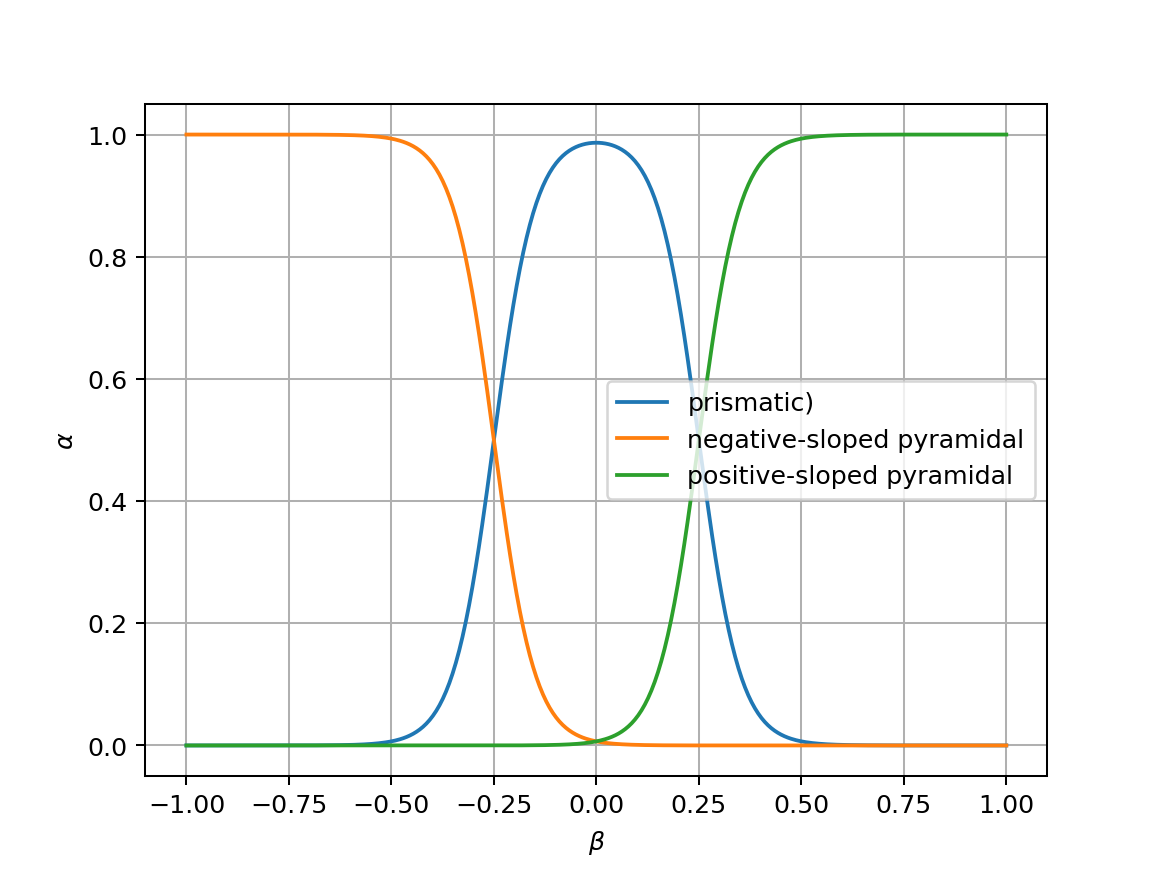

In [16]:
def get_alpha(beta,beta_trans,delta_beta):
    alpha = 1-1/(1+np.exp(-(beta-beta_trans)/delta_beta))
    return alpha

beta = np.linspace(-1,1,500)
delta_beta = 0.05

alpha_pyneg = get_alpha(beta,-.25,delta_beta)
alpha_pypos = 1-get_alpha(beta, .25,delta_beta)
alpha_pr = 1 - alpha_pyneg - alpha_pypos

plt.figure()
plt.plot(beta,alpha_pr,label='prismatic)')
plt.plot(beta,alpha_pyneg,label='negative-sloped pyramidal')
plt.plot(beta,alpha_pypos,label='positive-sloped pyramidal')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.grid(True)
plt.legend()

0.2617993877991494 radian


<IPython.core.display.Javascript object>


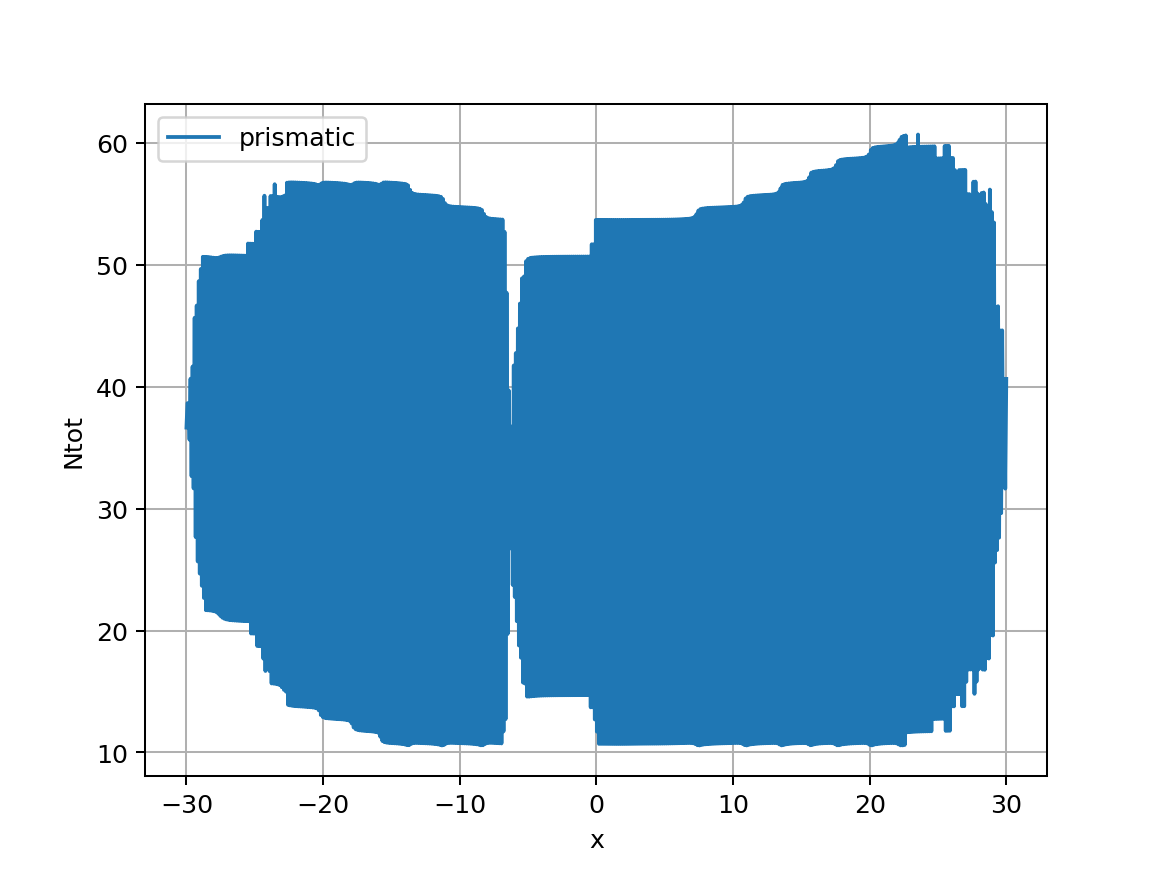

<IPython.core.display.Javascript object>


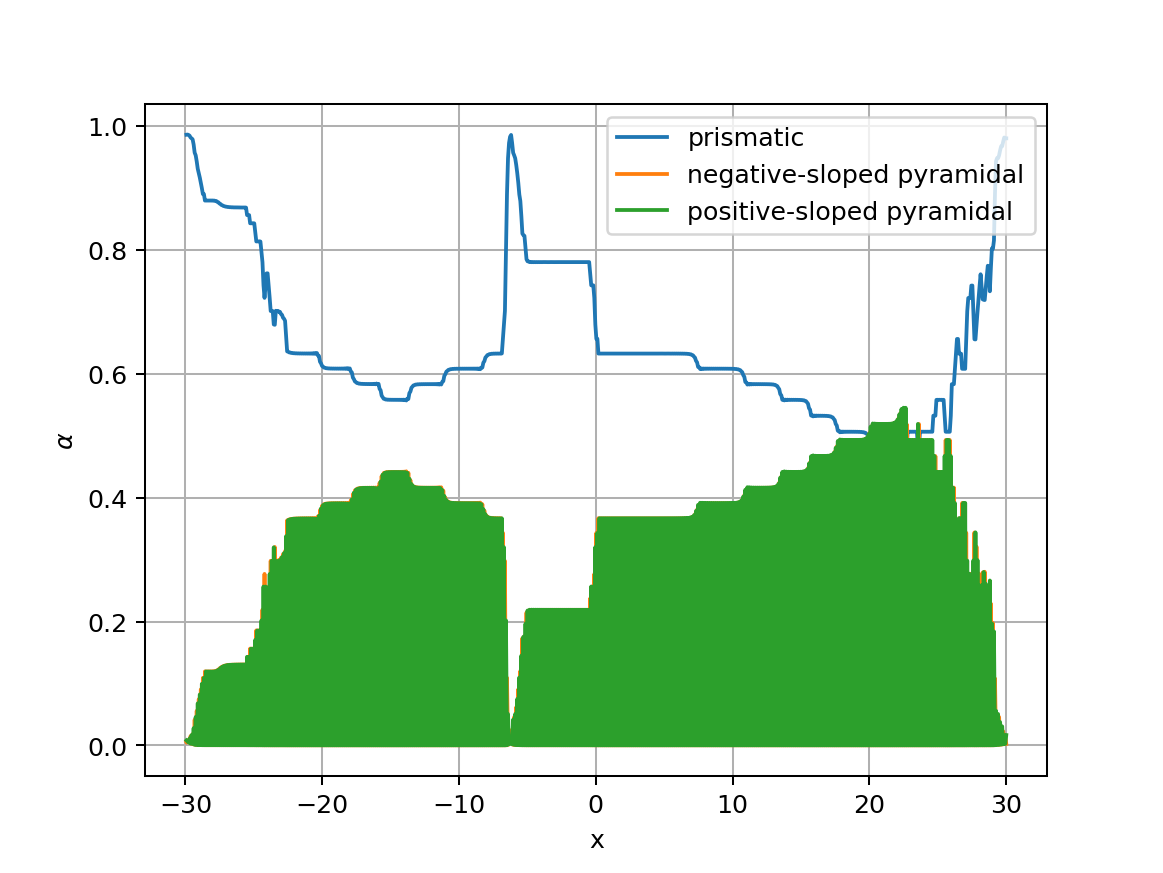

0.1432394487827058
0.11459155902616465


<IPython.core.display.Javascript object>


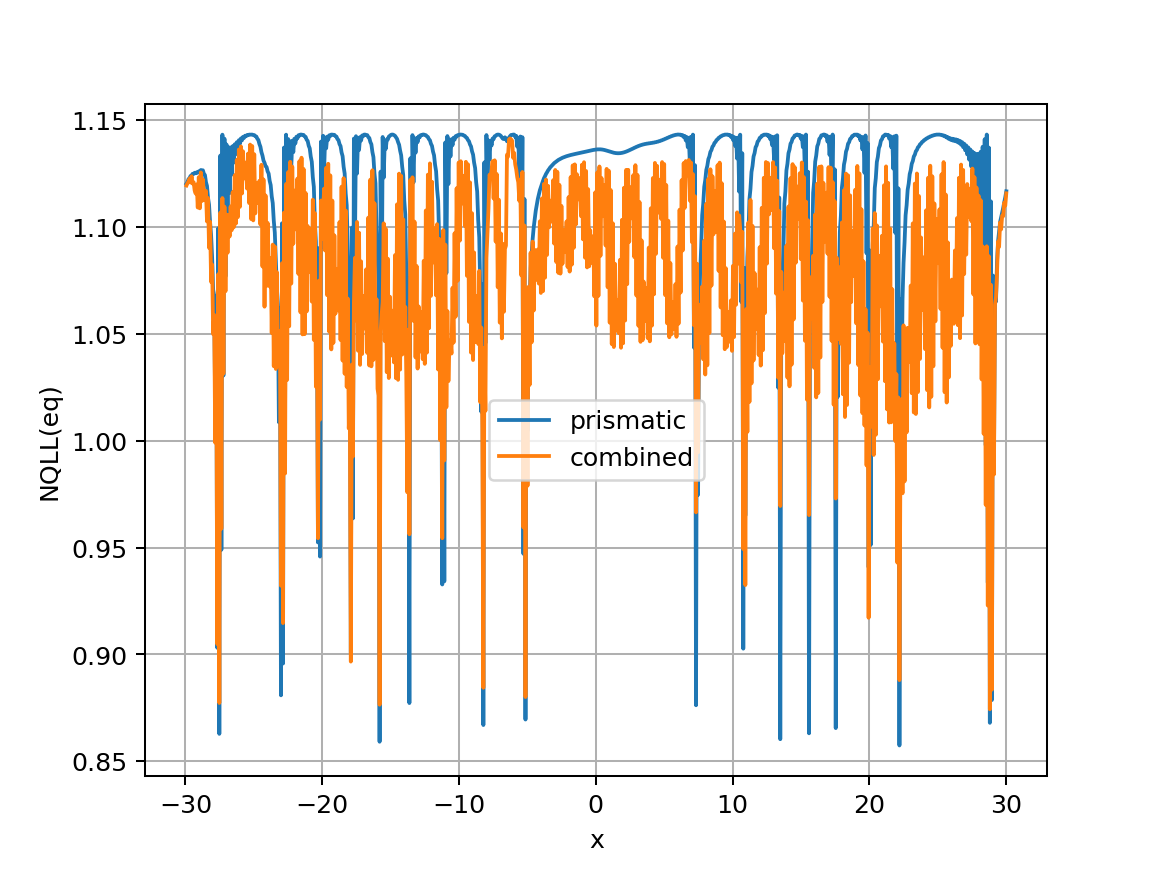

In [22]:
Ntot_pr = Ntot_5ms
# Ntot_pr = Ntot_85
theta = AssignQuantity(28,'degrees'); theta.ito('radian')
theta = AssignQuantity(15,'degrees'); theta.ito('radian'); print(theta)
h_pr = AssignQuantity(0.389,'nm')
h_py = h_pr
Ntot_pyneg = 1/h_py * (np.cos(theta)*h_pr* Ntot_pr -np.sin(theta)*x_QLC)
Ntot_pypos = 1/h_py * (np.cos(theta)*h_pr* Ntot_pr +np.sin(theta)*x_QLC)
plt.figure()
plt.plot(x_QLC,Ntot_pr,label='prismatic')
# plt.plot(x_QLC,Ntot_pyneg,label='negative-sloped pyramidal')
# plt.plot(x_QLC,Ntot_pypos,label='positive-sloped pyramidal')
plt.xlabel('x')
plt.ylabel('Ntot')
plt.grid(True)
plt.legend()

z_pr = h_pr * Ntot_pr
dx = x_QLC[1]-x_QLC[0]


# beta = np.diff(z_pr)/dx
beta = np.gradient(z_pr,dx)

beta.ito('dimensionless')
alpha_pyneg = get_alpha(beta,-.25,delta_beta)
alpha_pypos = 1-get_alpha(beta, .25,delta_beta)
alpha_pr = 1 - alpha_pyneg - alpha_pypos
plt.figure()
plt.plot(x_QLC[1:],alpha_pr,label='prismatic')
plt.plot(x_QLC[1:],alpha_pyneg,label='negative-sloped pyramidal')
plt.plot(x_QLC[1:],alpha_pypos,label='positive-sloped pyramidal')
plt.xlabel('x')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.grid(True)

Nbar = 1.0
Nstar_pr = .9/(2*np.pi); print(Nstar_pr)
Nstar_py = Nstar_pr*.8; print(Nstar_py)
NQLL_eq_pr    = Nbar - Nstar_pr*np.sin(2*np.pi*Ntot_pr[1:])
NQLL_eq_pyneg = Nbar - Nstar_py*np.sin(2*np.pi*Ntot_pyneg[1:])
NQLL_eq_pypos = Nbar - Nstar_py*np.sin(2*np.pi*Ntot_pypos[1:])
NQLL_eq = alpha_pr*NQLL_eq_pr + alpha_pyneg*NQLL_eq_pyneg + alpha_pypos*NQLL_eq_pypos
plt.figure()
plt.plot(x_QLC[1:],NQLL_eq_pr,   label='prismatic')
# plt.plot(x_QLC[1:],NQLL_eq_pyneg,label='negative-sloped pyramidal')
# plt.plot(x_QLC[1:],NQLL_eq_pypos,label='positive-sloped pyramidal')
plt.plot(x_QLC[1:],NQLL_eq,label='combined')
plt.xlabel('x')
plt.ylabel('NQLL(eq)')
plt.legend()
plt.grid(True)

<IPython.core.display.Javascript object>


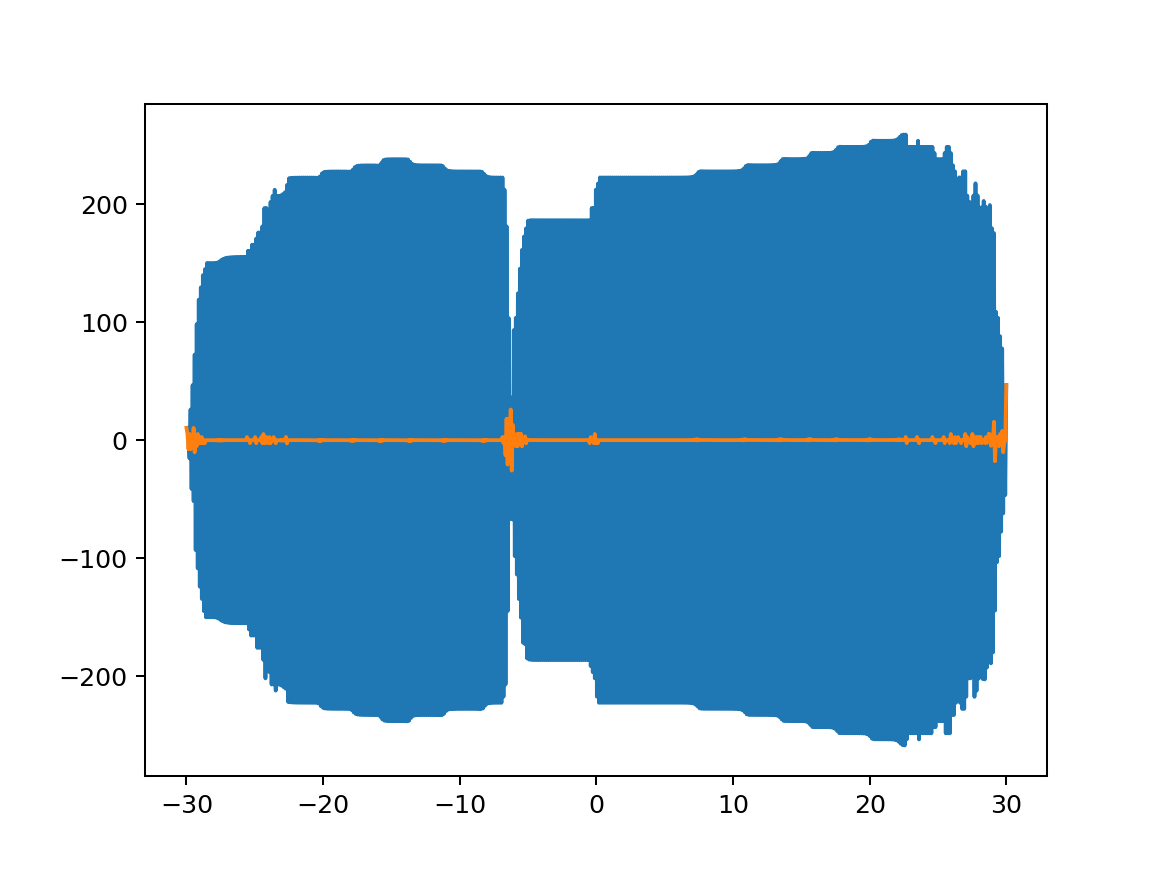

/Users/nesh/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [24]:
## It seems we can't use np.gradient for this purpose
# beta1 = np.diff(z_pr)/dx
# beta2 = np.gradient(z_pr,dx)
# plt.figure()
# plt.plot(x_QLC[1:],beta1)
# plt.plot(x_QLC,beta2)